Use dimensionality reduction (e.g., PCA or t-SNE) to visualize word embeddings for Q 1. Select 10 words from a
specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships.
Generate contextually rich outputs using embeddings. Write a program to generate 5 semantically similar words
for a given input.

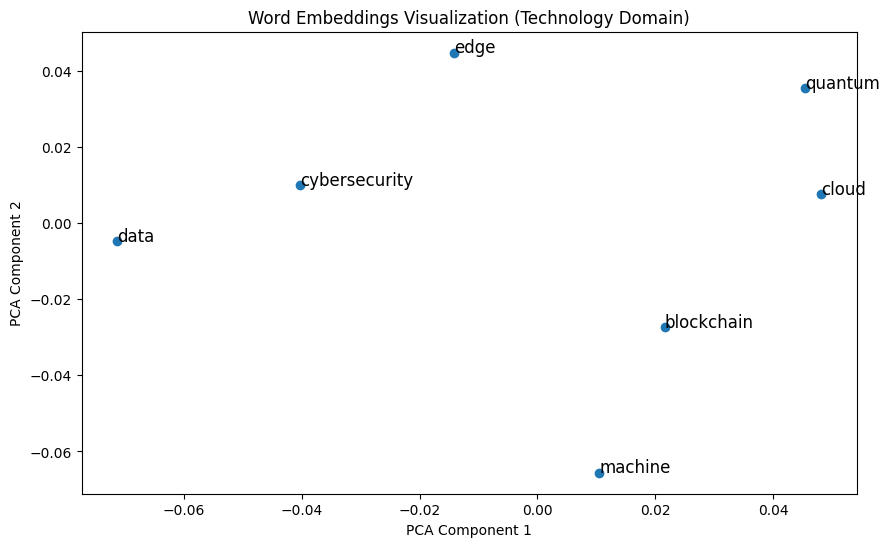

Top 5 words similar to 'technology': [('processing', 0.23986439406871796), ('has', 0.2173694223165512), ('seamlessly', 0.1937061995267868), ('blockchain', 0.18438692390918732), ('predictive', 0.17099258303642273)]


In [5]:
import gensim
from gensim.models import Word2Vec
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample domain-specific corpus (Technology)
technology_corpus = [
    "Artificial intelligence is transforming various industries.",
    "Machine learning algorithms improve predictive analytics.",
    "Cloud computing enables scalable infrastructure for businesses.",
    "Cybersecurity is crucial for protecting sensitive data.",
    "Blockchain technology ensures secure and decentralized transactions.",
    "The Internet of Things connects smart devices seamlessly.",
    "Big data analytics helps organizations make data-driven decisions.",
    "Quantum computing has the potential to revolutionize cryptography.",
    "Edge computing brings computation closer to data sources.",
    "Natural language processing enhances human-computer interactions."
]

# Basic text preprocessing function (tokenization & lowercasing)
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Preprocess corpus manually
preprocessed_corpus = [simple_tokenize(sentence) for sentence in technology_corpus]

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_corpus, vector_size=50, window=5, min_count=1, workers=4)

# Select 10 domain-specific words
selected_words = ["ai", "machine", "cloud", "cybersecurity", "blockchain", "iot", "data", "quantum", "edge", "nlp"]
# Filter selected words to include only words present in model.wv
selected_words = [word for word in selected_words if word in model.wv]

# Extract word embeddings for selected words
word_vectors = [model.wv[word] for word in selected_words if word in model.wv]

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Create DataFrame for visualization
df_embeddings = pd.DataFrame(reduced_vectors, columns=["x", "y"], index=selected_words)

# Plot embeddings
plt.figure(figsize=(10, 6))
plt.scatter(df_embeddings["x"], df_embeddings["y"], marker='o')

for word, (x, y) in zip(df_embeddings.index, reduced_vectors):
    plt.text(x, y, word, fontsize=12)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings Visualization (Technology Domain)")
plt.show()

# Function to get semantically similar words
def get_similar_words(word, top_n=5):
    if word in model.wv:
        return model.wv.most_similar(word, topn=top_n)
    else:
        return f"Word '{word}' not in vocabulary."

# Example usage
input_word = "technology"
similar_words = get_similar_words(input_word)
print(f"Top 5 words similar to '{input_word}':", similar_words)
